In [55]:
#THIS IS A TEST FOR STATIC CASE -- NOT INDICATIVE OF MOBILE CASES

import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [56]:
numCH = [None]*200
with open("Log-clusters.txt") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in data:
        numCH[count] = len(row)
        count = count+1
        for i in range(0,len(row)):
            row[i] = int(row[i])

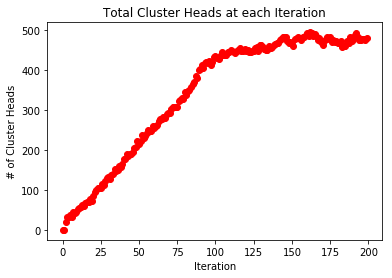

In [57]:
t = range(200)
plt.plot(t, numCH, 'ro')
plt.title("Total Cluster Heads at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Cluster Heads")
plt.show()

In [58]:
plt.figure()

def update_hist(num):
    plt.cla()
    plt.hist(data[num])
    plt.xlabel("Cluster Size")
    plt.ylabel("Frequency")
    plt.title("Cluster Sizes at T="+str(num))
    
fig = plt.figure()
hist = plt.hist(data[0])

In [59]:
num =0
animation = animation.FuncAnimation(fig, update_hist, 200, fargs=(num) )
HTML(animation.to_html5_video())

In [60]:
count = 0
total_nodes = 2000
print("Iteration\t\t    ClusterSize Freq\t\t\tNodes in Cluster\tCluster Heads\t  No Cluster")
#print("\t         \t    0   1   2   3   4   5   6   7   8")
for row in data:
    
    cluster_nodes = 0
    cluster_heads = 0
    count_array = np.bincount(row) 
    for i in range(0,len(count_array)):
        cluster_heads = cluster_heads + count_array[i]
        cluster_nodes = cluster_nodes + count_array[i]*(i+1)
    
    print("  ",count,"\t\t",np.bincount(row),"\t\t    ",cluster_nodes-cluster_heads,"\t\t  ",cluster_heads,"\t\t   ",total_nodes-cluster_nodes)
    count = count+1

Iteration		    ClusterSize Freq			Nodes in Cluster	Cluster Heads	  No Cluster
   0 		 [] 		     0 		   0 		    2000
   1 		 [] 		     0 		   0 		    2000
   2 		 [19] 		     0 		   19 		    1981
   3 		 [26  5  0  1] 		     8 		   32 		    1960
   4 		 [23  3  2  2  3] 		     25 		   33 		    1942
   5 		 [27  1  2  2  2  2  1  1] 		     42 		   38 		    1920
   6 		 [20  1  2  1  1  3  1  2  2] 		     63 		   33 		    1904
   7 		 [30  1  0  4  1  3  2  2  2] 		     74 		   45 		    1881
   8 		 [23  4  2  1  2  1  3  1  6] 		     97 		   43 		    1860
   9 		 [20  7  2  1  2  0  2  1  9] 		     113 		   44 		    1843
   10 		 [26  6  3  3  2  1  0  1 11] 		     129 		   53 		    1818
   11 		 [26  7  2  4  1  2  0  2 12] 		     147 		   56 		    1797
   12 		 [26  5  3  3  0  2  4  2 12] 		     164 		   57 		    1779
   13 		 [27  5  4  5  1  3  1  1 15] 		     180 		   62 		    1758
   14 		 [22  6  5  2  0  5  1  1 17] 		     196 		   59 		    1745
   15 		 [27  7  3  4  0  2  3  4

In [63]:
numCH = [None]*200
with open("Log-cluster_messages.txt") as csv_file:
    msg_data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in msg_data:
        for i in range(0,len(row)):
            row[i] = int(row[i])

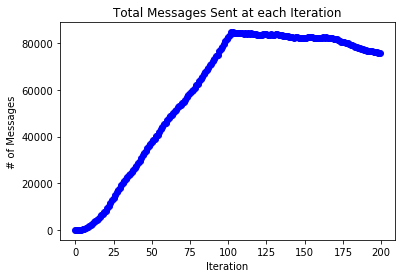

In [64]:
msg_clean = [x[:] for x in [[0] * 200] * 2]

for i in range(0,2):
    for j in range(0,200):
        msg_clean[i][j] = msg_data[j][i]

plt.plot(msg_clean[1],'bo')
plt.title("Total Messages Sent at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Messages")
plt.show()